In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

## Data Collection and cleaning

In [2]:
df = pd.read_csv('Rainfall.csv')
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [3]:
df.shape

(366, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [5]:
df.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [6]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [7]:
df = df.drop(columns=['day'])
df.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [8]:
# check for missing values
df.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [9]:
# handling missing values
df['winddirection'] = df['winddirection'].fillna(df['winddirection'].mode()[0])
df['windspeed'] = df['windspeed'].fillna(df['windspeed'].mean())

In [10]:
df.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [11]:
df['rainfall'].unique()

array(['yes', 'no'], dtype=object)

In [12]:
df['rainfall'] = df['rainfall'].map({'no': 0, 'yes': 1})
df.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


In [13]:
df.dtypes

pressure         float64
maxtemp          float64
temparature      float64
mintemp          float64
dewpoint         float64
humidity           int64
cloud              int64
rainfall           int64
sunshine         float64
winddirection    float64
windspeed        float64
dtype: object

In [14]:
df.shape

(366, 11)

## Exploratory Data Analysis (EDA)

In [15]:
df.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.536986
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.055908
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


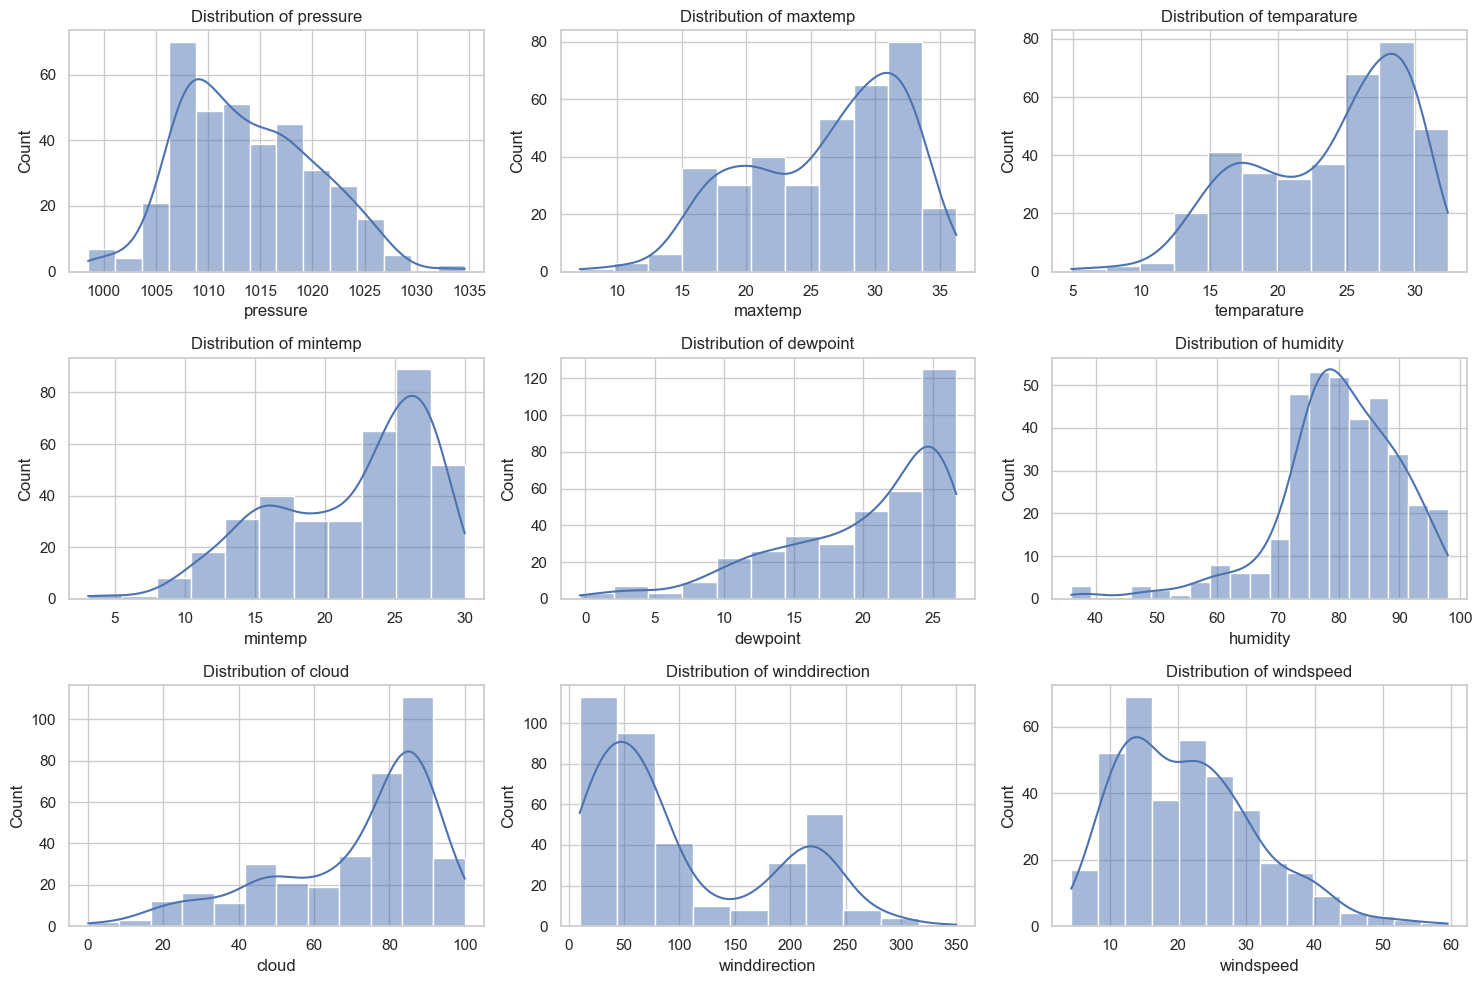

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

for i, column in enumerate(['pressure','maxtemp','temparature','mintemp','dewpoint','humidity','cloud','winddirection','windspeed'],1):
   plt.subplot(3, 3, i)
   sns.histplot(df[column], kde=True)
   plt.title(f'Distribution of {column}')
   
plt.tight_layout()
plt.show()
    
     

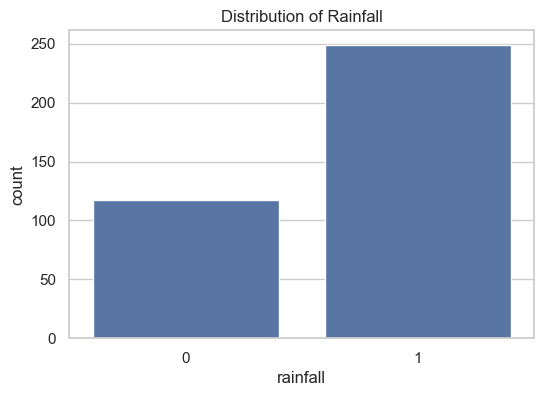

In [19]:
# Target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='rainfall', data=df)
plt.title('Distribution of Rainfall')
plt.show()

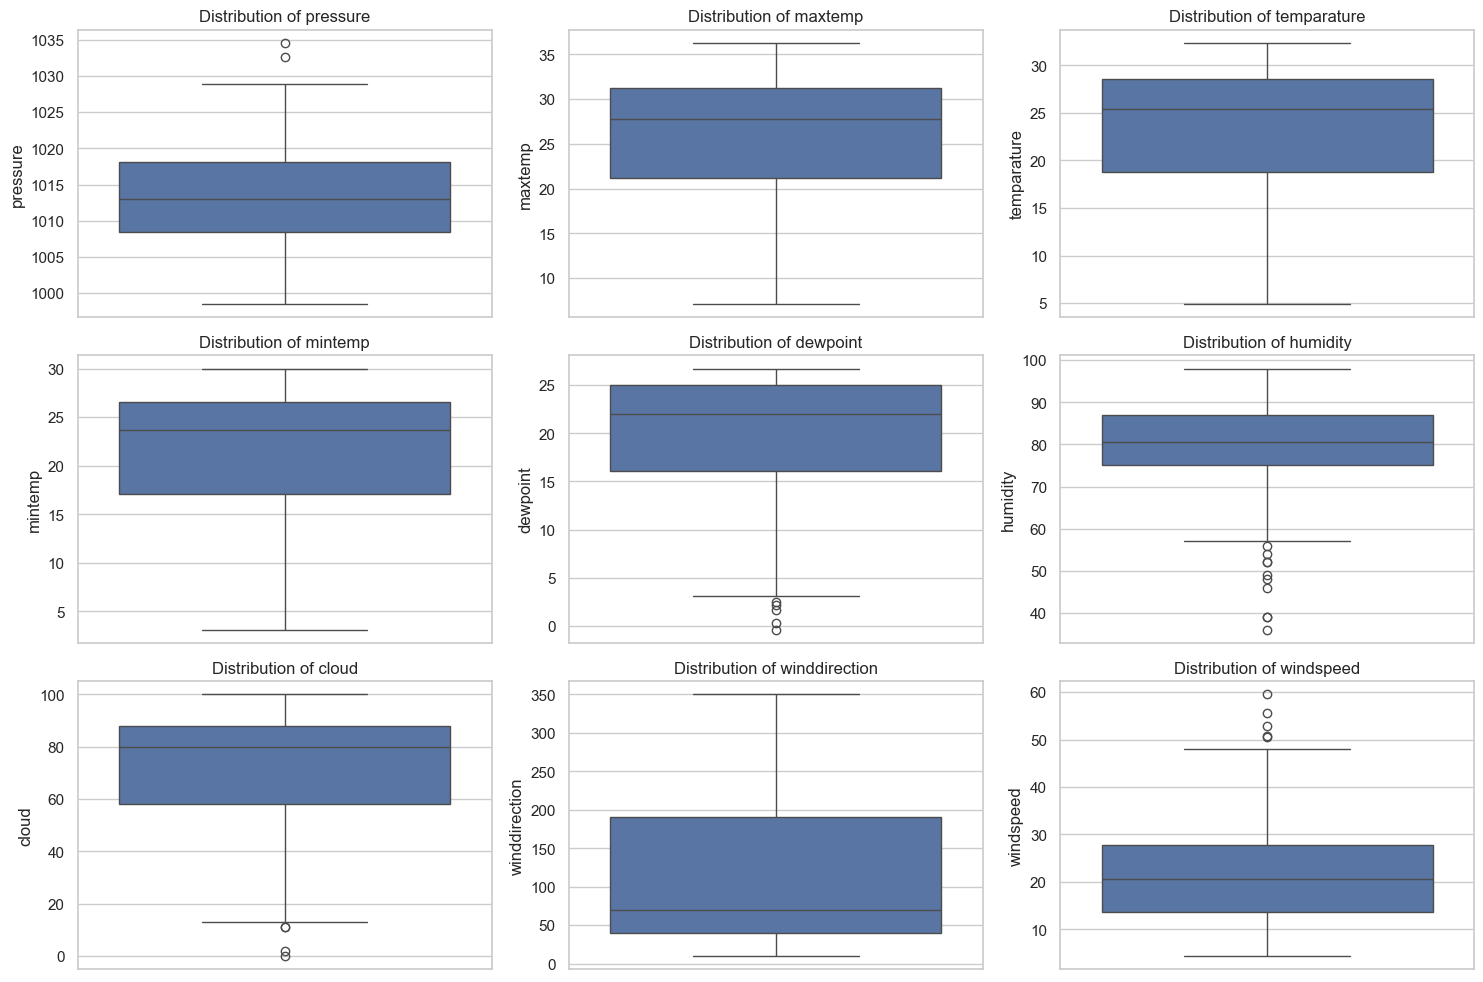

In [ ]:
# To check for outliers
plt.figure(figsize=(15, 10))

for i, column in enumerate(['pressure','maxtemp','temparature','mintemp','dewpoint','humidity','cloud','winddirection','windspeed'],1):
   plt.subplot(3, 3, i)
   sns.boxplot(df[column])
   plt.title(f'Distribution of {column}')
   
plt.tight_layout()
plt.show()

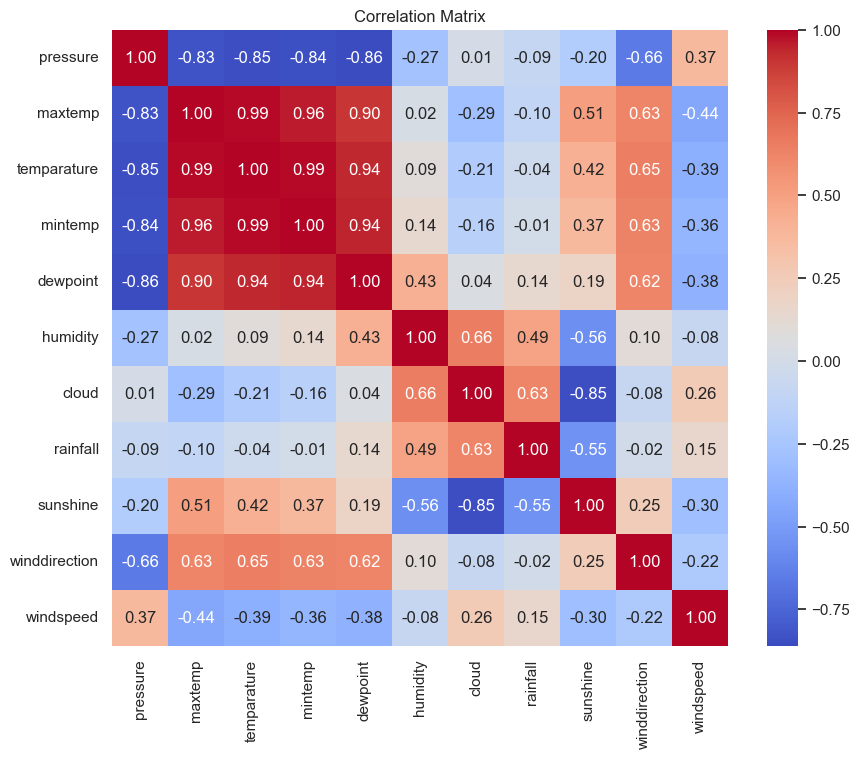

In [22]:
# correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

### Data Preprocessing

In [23]:
# drop multicollinearity
df = df.drop(columns=['maxtemp', 'temparature', 'mintemp'])
df.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7


In [24]:
df['rainfall'].value_counts()

rainfall
1    249
0    117
Name: count, dtype: int64

In [25]:
# separate majority and minority classes
df_majority = df[df['rainfall'] == 1]
df_minority = df[df['rainfall'] == 0]

In [26]:
# downsample majority class
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

In [27]:
# concatenate minority class with downsampled majority class
df_balanced = pd.concat([df_majority_downsampled, df_minority])
df_balanced.shape

(234, 8)

In [28]:
df_balanced.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
188,1005.9,25.6,77,53,1,10.5,270.0,11.3
9,1017.5,15.5,85,91,1,0.0,70.0,37.7
137,1012.3,20.1,80,86,1,0.3,80.0,39.5
89,1018.3,16.3,79,89,1,2.4,40.0,14.8
157,1008.8,24.7,91,80,1,2.2,20.0,11.2


In [29]:
# shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
df_balanced.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1022.2,14.1,78,90,1,0.0,30.0,28.5
1,1013.4,19.5,69,17,0,10.5,70.0,12.4
2,1006.1,24.4,74,27,0,10.8,220.0,8.7
3,1007.6,24.8,85,84,1,1.8,70.0,34.8
4,1021.2,8.4,66,18,0,10.1,20.0,24.4


In [30]:
df_balanced['rainfall'].value_counts()

rainfall
1    117
0    117
Name: count, dtype: int64

### Modeling

In [31]:
X = df_balanced.drop(columns=['rainfall'])
y = df_balanced['rainfall']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [35]:
from sklearn.model_selection import StratifiedKFold
model_params = {
    "Random Forest": {
        "pipeline": Pipeline([
            ('scaler', StandardScaler()),
            ('clf', RandomForestClassifier(random_state=42))
        ]),
        "params": {
            "clf__n_estimators": [100, 200, 300],
            "clf__max_depth": [None, 10, 20, 30],
            "clf__min_samples_split": [2, 5, 10],
            "clf__min_samples_leaf": [1, 2, 4],
            "clf__max_features": ['sqrt', 'log2', None],
            "clf__bootstrap": [True, False]
        }
    },
    "Logistic Regression": {
        "pipeline": Pipeline([
            ('scaler', StandardScaler()),
            ('clf', LogisticRegression(max_iter=2000, solver='saga'))
        ]),
        "params": {
            "clf__penalty": ['l1', 'l2', 'elasticnet'],
            "clf__C": [0.001, 0.01, 0.1, 1, 10],
            "clf__l1_ratio": [0.1, 0.5, 0.9]  # Used only for 'elasticnet'
        }
    },
    "SVC": {
        "pipeline": Pipeline([
            ('scaler', StandardScaler()),
            ('clf', SVC())
        ]),
        "params": {
            "clf__C": [0.1, 1, 10, 100],
            "clf__kernel": ['linear', 'rbf', 'poly', 'sigmoid'],
            "clf__gamma": ['scale', 'auto'],
            "clf__degree": [2, 3, 4]  # Only used when kernel is 'poly'
        }
    }
}

# Train models and get best estimators
best_models = []
best_estimators = {}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, mp in model_params.items():
    print(f"\nTraining {name}...")

    # Special handling for Logistic Regression to avoid invalid l1_ratio usage
    if name == "Logistic Regression":
        valid_params = []
        for penalty in ['l1', 'l2', 'elasticnet']:
            for C in [0.001, 0.01, 0.1, 1, 10]:
                if penalty == 'elasticnet':
                    for l1_ratio in [0.1, 0.5, 0.9]:
                        valid_params.append({
                            "clf__penalty": [penalty],
                            "clf__C": [C],
                            "clf__l1_ratio": [l1_ratio]
                        })
                else:
                    valid_params.append({
                        "clf__penalty": [penalty],
                        "clf__C": [C]
                    })
        grid = GridSearchCV(mp['pipeline'], valid_params, cv=cv, n_jobs=-1, scoring='accuracy')
    else:
        grid = GridSearchCV(mp['pipeline'], mp['params'], cv=cv, n_jobs=-1, scoring='accuracy')

    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    best_models.append({
        'Model': name,
        'Best Parameters': grid.best_params_,
        'CV Score': round(grid.best_score_, 4),
        'Test Accuracy': round(acc, 4)
    })

    best_estimators[name] = grid.best_estimator_

# Summary DataFrame
results_df = pd.DataFrame(best_models)
print("\nModel Performance Summary:")
print(results_df)



Training Random Forest...

Training Logistic Regression...

Training SVC...

Model Performance Summary:
                 Model                                    Best Parameters  \
0        Random Forest  {'clf__bootstrap': True, 'clf__max_depth': Non...   
1  Logistic Regression                {'clf__C': 1, 'clf__penalty': 'l2'}   
2                  SVC  {'clf__C': 0.1, 'clf__degree': 2, 'clf__gamma'...   

   CV Score  Test Accuracy  
0    0.8132         0.7447  
1    0.8296         0.6596  
2    0.8135         0.6596  


In [39]:
rf_model=best_estimators['Random Forest']
y_pred_rf = rf_model.predict(X_test)
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Print confusion matrix
print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.72      0.78      0.75        23

    accuracy                           0.74        47
   macro avg       0.75      0.75      0.74        47
weighted avg       0.75      0.74      0.74        47

Confusion Matrix for Random Forest:
[[17  7]
 [ 5 18]]


### Prediction on unknown data

In [40]:
input_data = (1015.9, 19.9, 95, 81, 0.0, 40.0, 13.7)

input_df = pd.DataFrame([input_data], columns=['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine','winddirection', 'windspeed'])

In [41]:
prediction = rf_model.predict(input_df)
print("Prediction for the input data:", "Rainfall" if prediction[0] == 1 else "No Rainfall")

Prediction for the input data: Rainfall


In [42]:
# save the model
model_data = {'model': rf_model, 'features': X.columns.tolist()}

with open('rain_prediction_model.pkl', 'wb') as file:
    pickle.dump(model_data, file)

### Load pickle file

In [44]:
with open('rain_prediction_model.pkl', 'rb') as file:
    
    model_data = pickle.load(file)

In [45]:
model = model_data['model']
features = model_data['features']

In [46]:
input_data = (1012.3, 15.2, 55, 10, 8.2, 120.0, 5.5)
# High pressure, low humidity, lots of sunshine
input_df = pd.DataFrame([input_data], columns=features)

In [47]:
prediction = rf_model.predict(input_df)
print("Prediction for the input data:", "Rainfall" if prediction[0] == 1 else "No Rainfall")


Prediction for the input data: No Rainfall


In [48]:
input_data1 = (1008.0, 22.1, 92, 85, 0.0, 190.0, 15.3)
# Low pressure, high humidity, dense clouds, no sun
input_df1 = pd.DataFrame([input_data1], columns=features)

In [49]:
prediction = rf_model.predict(input_df1)
print("Prediction for the input data:", "Rainfall" if prediction[0] == 1 else "No Rainfall")


Prediction for the input data: Rainfall
